<a href="https://colab.research.google.com/github/Isabelatorres2/Data-_Mining_2025_II/blob/analisis-inicial-Isabela-Torres/Employe_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Introducción y carga de datos**

In [ ]:
# Importamos librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Cargamos los datos
# Cargar los datos descargados de Kaggle LINK: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

2. Entendimiento del negocio y datos (CRISP: Business & Data Understanding)

In [ ]:
# Paso 3: Revisar las columnas disponibles
print(df.columns)

# Paso 4: Ver resumen de los datos
df.describe(include='all')

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


**3. Preparación de datos (CRISP: Data Preparation)**

In [ ]:
# Preprocesamiento
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [ ]:
# Selección de variables base
features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'OverTime']
df = df[features + ['Attrition']]

In [ ]:
# Verificar que ya no hay valores faltantes
df.isnull().sum()

,0
Age,0
MonthlyIncome,0
DistanceFromHome,0
OverTime,0
Attrition,0


**4. Modelado (CRISP: Modeling)**

In [ ]:
X = df[features]
y = df['Attrition']

In [ ]:
# División
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Evaluación
y_pred = model.predict(X_test)
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.8503401360544217


# **Tu misión es completar los siguientes datos**

In [ ]:
# COMPLETAR
#Mostrar primeras 10 predicciones y comparar con valores reales
# Mostrar primeras 10 predicciones junto con valores reales
predicciones_vs_reales = pd.DataFrame({
    'Predicción': y_pred[:10],
    'Valor Real': y_test[:10].values
})
print(predicciones_vs_reales)


   Predicción  Valor Real
0           0           0
1           0           0
2           0           1
3           0           0
4           0           0
5           0           0
6           0           0
7           0           0
8           0           0
9           0           0


Text(0.5, 1.0, 'Árbol de Decisión para Rotación de personal en IBM')

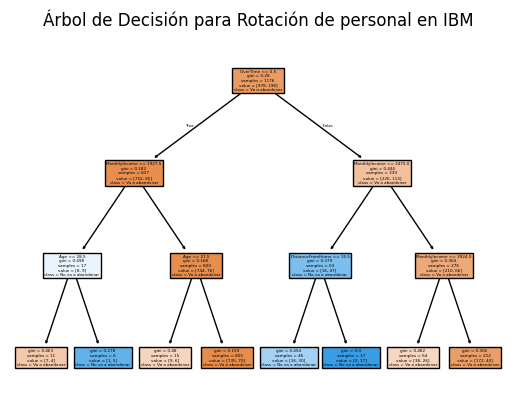

In [ ]:
# Graficar el árbol para observar variables y relaciones
#PISTAS ==> Para que el título y las etiquetas se puedan entender usar lo siguiente en la línea pertinente
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plot_tree(model, feature_names=features, class_names=["Va a abandonar", "No va a abandonar"], filled=True)
plt.title("Árbol de Decisión para Rotación de personal en IBM")

plt.show()

In [ ]:
# Ahora Probamos el modelo con una persona nueva
# Por ejemplo: Edad: 25 años, Ingresos: US$2000, Distancia del hogar: 2000 millas, Horas extra: SI (1)
nueva_persona = pd.DataFrame({'Age': [35], 'MonthlyIncome': [2000], 'DistanceFromHome': [2000], 'OverTime': [1] })
prediccion = model.predict(nueva_persona)
print(prediccion)

[1]


In [1]:
print("¿Esta persona se iriá de la empresa?")
if prediccion[0] == 0:
     print("✅ ¡No Se va de la empresa! 😀")
else:
    print("❌ Si, si piensa ir. 😢")

¿Esta persona se iriá de la empresa?


NameError: name 'prediccion' is not defined